<a href="https://colab.research.google.com/github/Gilf641/Graduate-Admissions-Analysis/blob/master/Copy_of_Graduate_Admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load all the required libraries

import pandas as pd
import numpy as np

# for data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

# mount the dataset from local drive
from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))


Saving Admission_Predict.csv to Admission_Predict.csv


In [3]:
df = df2
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Some assumptions about the dataset

Since the Univ Rating is given out of 5, I'm gonna use Tier system here in this analysis. The reason behind this is it becomes easy to understand.



1.   Tier1 - University Rating of 4/5
2.   Tier2 - University Rating of 3
3.   Tier3 - University Rating of 2/1



In [4]:
# Summarize the data
df.describe()

# checking if the data contains any null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
# Data Analysis

_gre = df['GRE Score'].mean()
_toefl = df['TOEFL Score'].mean()
_cgpa = df['CGPA'].mean()

# _sop = np.round(data['SOP'].mean())
# _lor = np.round(data['LOR '].mean())

# contains all the column names present in the dataframe
df_tuple = df.columns


# Function to find mean, max and min values of the variables packed in one

def mean_max_min(tuple_containing_columns, mode):
  _dict1 = {}
  if mode == 'mean':
    for i in tuple_containing_columns:
      _dict1[i] = round(df[str(i)].mean(),3) 
  elif mode == 'max':
    for i in tuple_containing_columns:
      _dict1[i] = round(df[str(i)].max(),3) 
  elif mode == 'min':
    for i in tuple_containing_columns:
      _dict1[i] = round(df[str(i)].min(),3) 
  
  return _dict1


# Find the average, max & min values of GRE, TOEFL, LOR, CGPA etc

measures = ('mean', 'max', 'min')
for i in measures:
  print(i+' values:')
  print(mean_max_min(df_tuple[1:],  str(i)))
  print('.'*17)

mean values:
{'GRE Score': 316.808, 'TOEFL Score': 107.41, 'University Rating': 3.087, 'SOP': 3.4, 'LOR ': 3.453, 'CGPA': 8.599, 'Research': 0.547, 'Chance of Admit ': 0.724}
.................
max values:
{'GRE Score': 340, 'TOEFL Score': 120, 'University Rating': 5, 'SOP': 5.0, 'LOR ': 5.0, 'CGPA': 9.92, 'Research': 1, 'Chance of Admit ': 0.97}
.................
min values:
{'GRE Score': 290, 'TOEFL Score': 92, 'University Rating': 1, 'SOP': 1.0, 'LOR ': 1.0, 'CGPA': 6.8, 'Research': 0, 'Chance of Admit ': 0.34}
.................


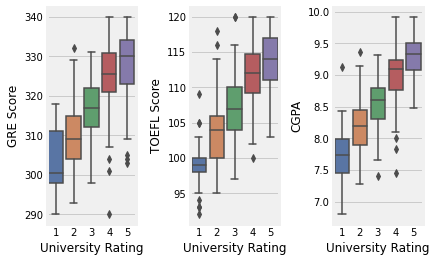

In [6]:
# Data Visualizations

f, axes = plt.subplots(1, 3) # IDK about this
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=None) # subplot parameters


sns.set(rc={'figure.figsize':(11,8)}) # sets up the graph size


sns.boxplot( df['University Rating'], df['GRE Score'], orient = 'v', ax = axes[0]) # creates boxplot
sns.boxplot( df['University Rating'], df['TOEFL Score'], orient = 'v', ax = axes[1])
sns.boxplot(df['University Rating'], df['CGPA'], orient = 'v', ax = axes[2])

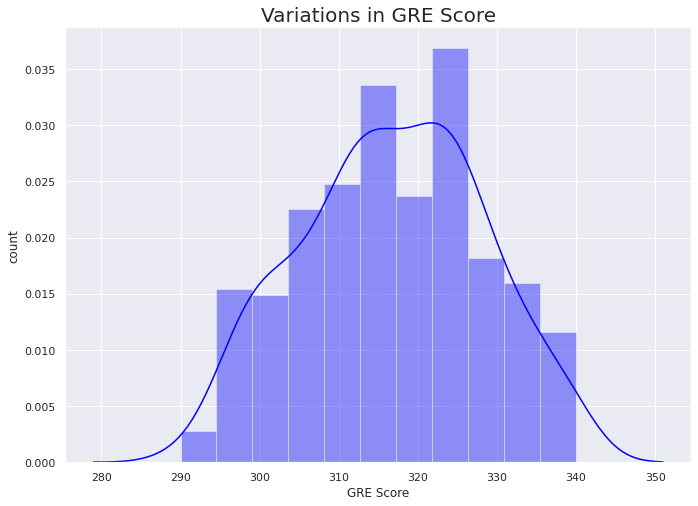

In [7]:

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,8)
# plt.style.use('_classic_test')

sns.distplot(df['GRE Score'], color = 'blue')
plt.title('Variations in GRE Score', fontsize = 20)
plt.xlabel('GRE Score')
plt.ylabel('count')
plt.show()



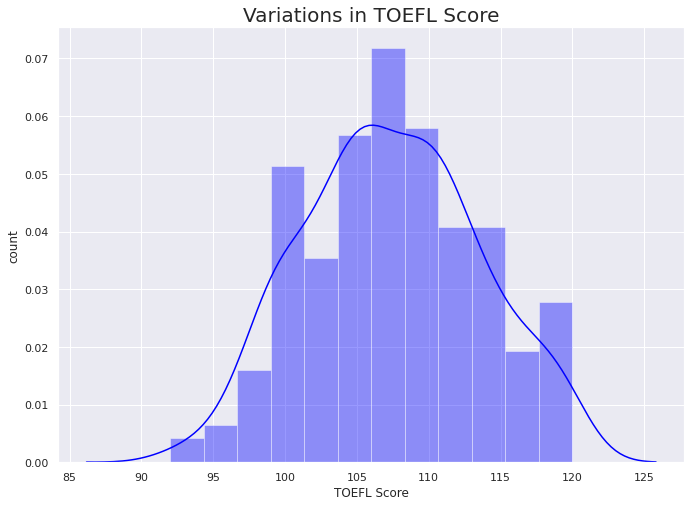

In [8]:
plt.rcParams['figure.figsize'] = (10,8)


sns.distplot(df['TOEFL Score'], color = 'blue')
plt.title('Variations in TOEFL Score', fontsize = 20)
plt.xlabel('TOEFL Score')
plt.ylabel('count')
plt.show()



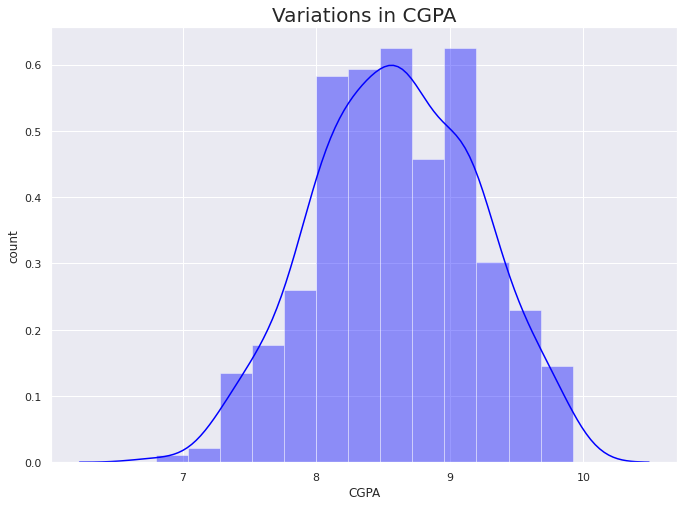

In [9]:
plt.rcParams['figure.figsize'] = (10,8)

sns.distplot(df['CGPA'], color = 'blue')
plt.title('Variations in CGPA', fontsize = 20)
plt.xlabel('CGPA')
plt.ylabel('count')
plt.show()

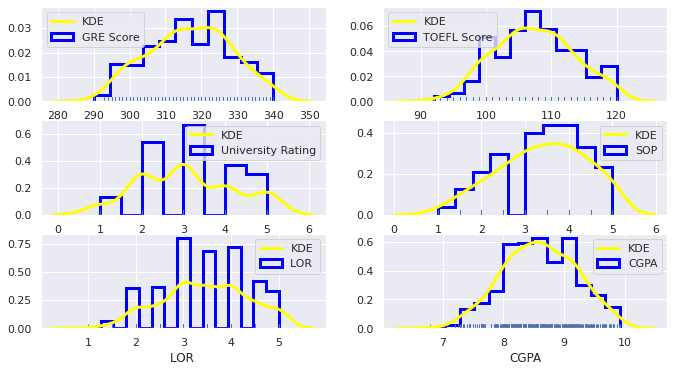

In [10]:
# Code Snippet for sns.distplot in facet.grid style

i = 0

for item in df.columns[1:-2]:
    i += 1
    plt.subplot(4, 2, i)
    sns.distplot(df[item], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "yellow", "lw": 3, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(item))
plt.show()

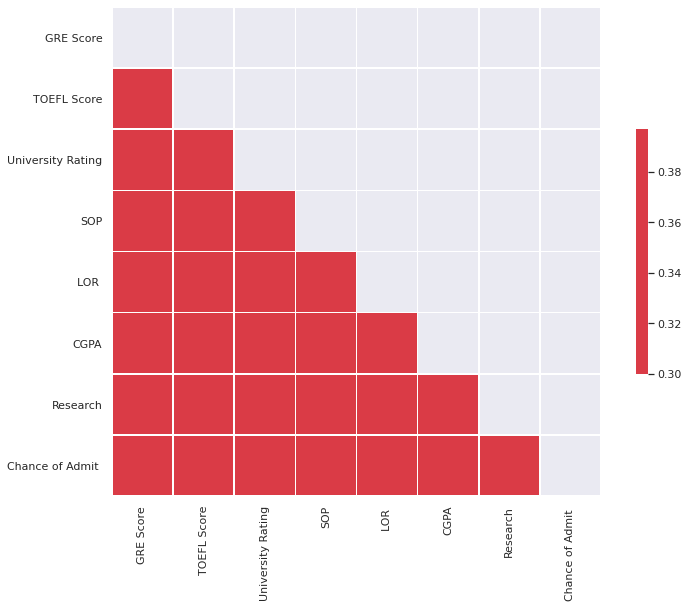

In [11]:
# Correlation analysis

# remove Serial No

df_corr = df.drop('Serial No.', 1)

corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

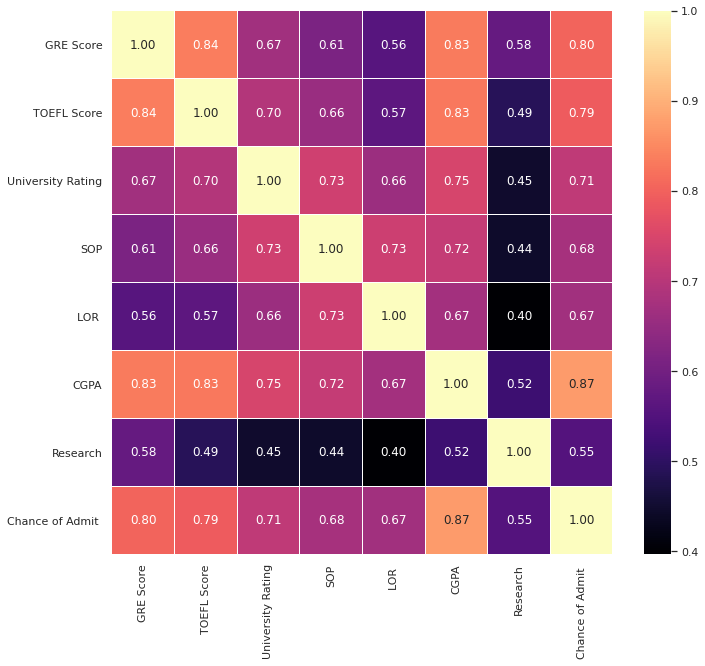

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

# Insights 
'''
Chances of Admit mainly depend on GRE, TOEFL Score and apart from that University Rating, SOP & LOR add some weightage
'''

df_corr.corr()


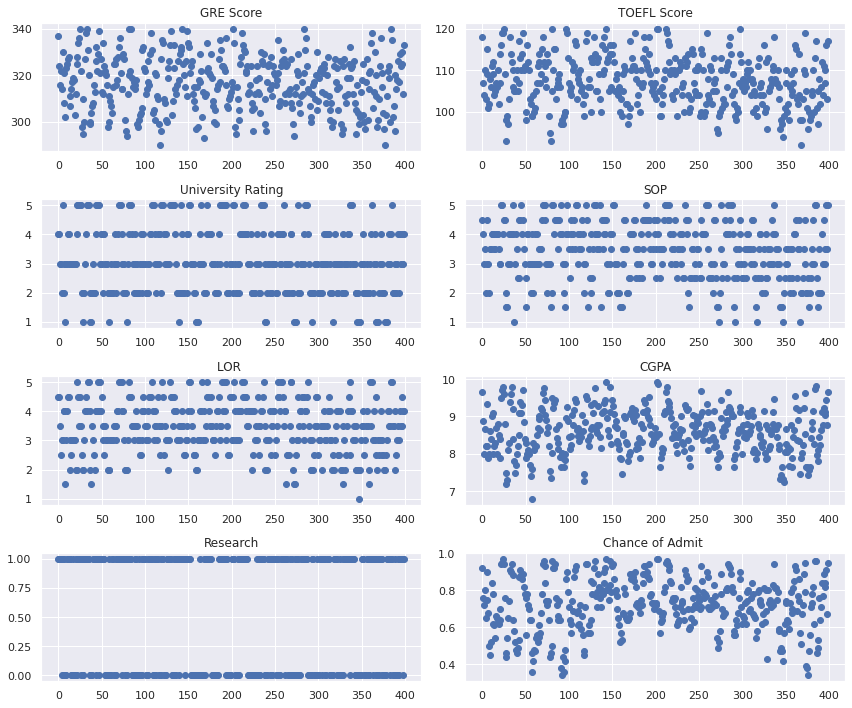

In [13]:
# Code Snippet for scatter plots

for i, col in enumerate(df_corr.columns):   
    plt.subplot(4,2,i+1)
    plt.scatter(np.arange(0,400),df_corr[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12, 10)
    plt.tight_layout()
plt.show()

<Figure size 1008x1008 with 0 Axes>

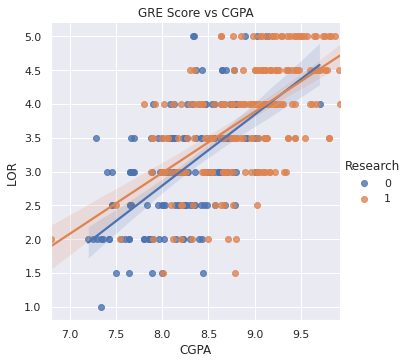

In [14]:
plt.figure(figsize = (14,14))

fig = sns.lmplot(x="CGPA", y="LOR ", data=df_corr, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()


# This actually holds true
# Students with good CGPA will have a real zeal in what they are studying and focus on getting into research while 7 and 8 pointers rarely get into that field

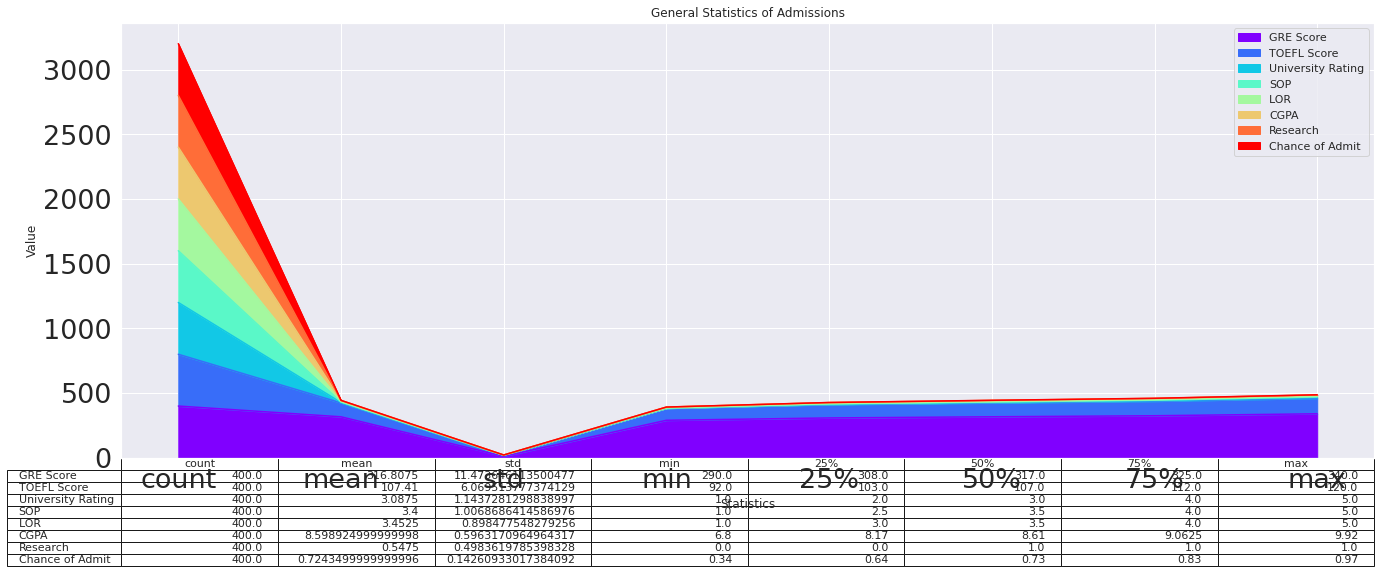

In [15]:
df_corr.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")
plt.show()

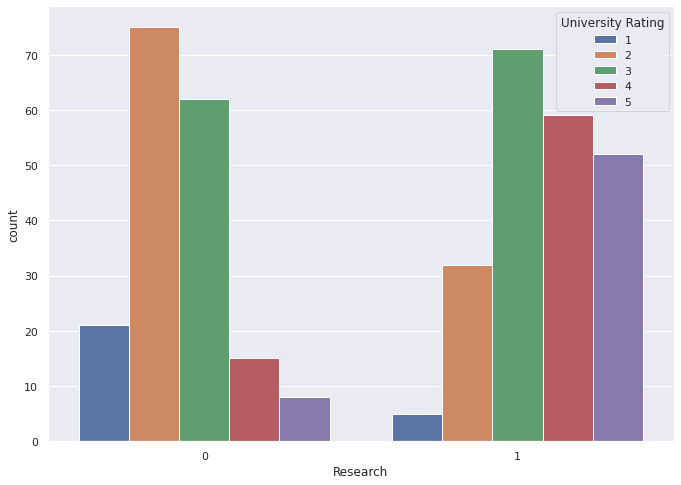

In [16]:
# Now let's check do students with 85% chances of admit have published a research paper?

df_corr[df_corr['Chance of Admit ']> 0.85].groupby('Research')['University Rating'].sum()

# countplot
sns.countplot(x = 'Research', hue = 'University Rating', data = df_corr)
plt.show()

# Most of student with no research background are from Tier3 etc colleges. 

In [17]:
df_corr['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [33]:
# We'll do something like cross tab analysis
# like Research vs Chances of Admit, CGPA vs Chances of Admit etc

researchAdmit = pd.crosstab(df_corr['Chance of Admit '], df_corr['Research'] ) # cross-tab of Research vs CoA
# researchAdmit

researchAdmit

Research,0,1
Chance of Admit,,
0.34,2,0
0.36,1,1
0.38,2,0
0.39,1,0
0.42,3,0
0.43,1,0
0.44,0,3
0.45,2,0
0.46,4,1
